In [64]:
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import uproot as up
import yaml
import matplotlib.ticker as ticker

from scipy.interpolate import CubicSpline

In [65]:

with open('/work/submit/mori25/Darkphotons_ludo/offline_analysis/limits/HEPData-ins2704121-v1-Figure_5-a.yaml', 'r') as file:
    data = yaml.safe_load(file)

# Print the data
mass_95_R2 = np.array([data['independent_variables'][0]['values'][i]['value'] for i in range(len(data['independent_variables'][0]['values']))])
central_95_R2 = np.array([data['dependent_variables'][2]['values'][i]['value'] for i in range(len(data['dependent_variables'][0]['values']))])
observed_95_R2 = np.array([data['dependent_variables'][5]['values'][i]['value'] for i in range(len(data['dependent_variables'][0]['values']))])
# print(data)
# print([data['dependent_variables'][i]['header'] for i in range(len(data['dependent_variables']))])
# print( mass_95_R2)

q_95_R2 = np.argmin(abs(mass_95_R2 - 2.8))

In [66]:

with open('/work/submit/mori25/Darkphotons_ludo/offline_analysis/limits/90CLse2.yaml', 'r') as file:
    data = yaml.safe_load(file)

# Print the data


# print([data['dependent_variables'][i]['header'] for i in range(len(data['dependent_variables']))])
# print( mass_90_R2)

mass_90_R2 = np.array([data['independent_variables'][0]['values'][i]['value'] for i in range(len(data['independent_variables'][0]['values']))])
observed_90_R2 = np.array([data['dependent_variables'][0]['values'][i]['value'] for i in range(len(data['dependent_variables'][0]['values']))])
# print(data)

q_90_R2 = np.argmin(abs(mass_90_R2 - 2.8))

In [67]:

with open('/work/submit/mori25/Darkphotons_ludo/offline_analysis/limits/acceptance_R2.yaml', 'r') as file:
    data = yaml.safe_load(file)

# Print the data
mass_acceptance = np.array([data['independent_variables'][0]['values'][i]['value'] for i in range(len(data['independent_variables'][0]['values']))])
acceptance_R2 = np.array([data['dependent_variables'][0]['values'][i]['value'] for i in range(len(data['dependent_variables'][0]['values']))])
# print(data)
# print([data['dependent_variables'][i]['header'] for i in range(len(data['dependent_variables']))])
# print( mass_95_R2)

In [68]:

xsec = 1.
num_mass_regions = 139
growth_factor = 0.01


def get_lims(CLs_95=True):
    # Initialize arrays, set some parameters
    limit1 = []
    limit195up = []
    limit195down = []
    limit168up = []
    limit168down = []
    mass = []
    masserr = []
    
    m_tmp = 2
    for d in range(num_mass_regions):
        m_tmp += m_tmp * growth_factor
        if (26 < d < 74):
            continue
        if CLs_95: f = up.concatenate(f"/data/submit/mori25/dark_photons_ludo/DimuonTrees/limits/full_no_nuisances/output_expected_CLs95/higgsCombineasympMassIndex_{str(d)}.AsymptoticLimits.mH*.root:limit")
        else:      f = up.concatenate(f"/data/submit/mori25/dark_photons_ludo/DimuonTrees/limits/full_no_nuisances/output_expected_CLs90/higgsCombineasympMassIndex_CLs90_{str(d)}.AsymptoticLimits.mH*.root:limit")
        exp = f['limit']
        # print(exp, f['mh'][0])
        limit1.append(exp[2])
        limit195up.append(exp[0])  # Dummy uncertainties
        limit195down.append(exp[4])
        limit168up.append(exp[1])
        limit168down.append(exp[3])
        mass.append(m_tmp)
        # masserr.append(0.)

    # Convert lists to numpy arrays for plotting
    mass = np.array(mass)
    limit1 = np.array(limit1)
    limit195up = np.array(limit195up)
    limit195down = np.array(limit195down)
    limit168up = np.array(limit168up)
    limit168down = np.array(limit168down)

    q = np.argmin(np.abs(mass - 3))
    print(mass[q],mass[q+1])

    return mass,limit1,limit168down,limit168up,limit195down,limit195up,q
    


[[4.00000000e+00 5.00000000e+00 1.60273447e+07 3.66776370e+04]
 [5.00000000e+00 6.00000000e+00 9.09740777e+06 2.45677306e+04]
 [6.00000000e+00 7.00000000e+00 5.56719535e+06 2.08595419e+04]
 [7.00000000e+00 8.00000000e+00 3.61420234e+06 1.71150639e+04]
 [8.00000000e+00 9.00000000e+00 2.45797347e+06 1.53691764e+04]
 [9.00000000e+00 1.00000000e+01 1.73484803e+06 1.16682600e+04]
 [1.00000000e+01 1.10000000e+01 1.26198031e+06 7.77641551e+03]]
[[7.00000000e+00 8.00000000e+00 2.15451996e+06 1.30177990e+03]
 [8.00000000e+00 9.00000000e+00 1.55018277e+06 1.95323559e+03]
 [9.00000000e+00 1.00000000e+01 1.14518783e+06 1.09732057e+04]]
1017443.7086636713 1476230.4601364145


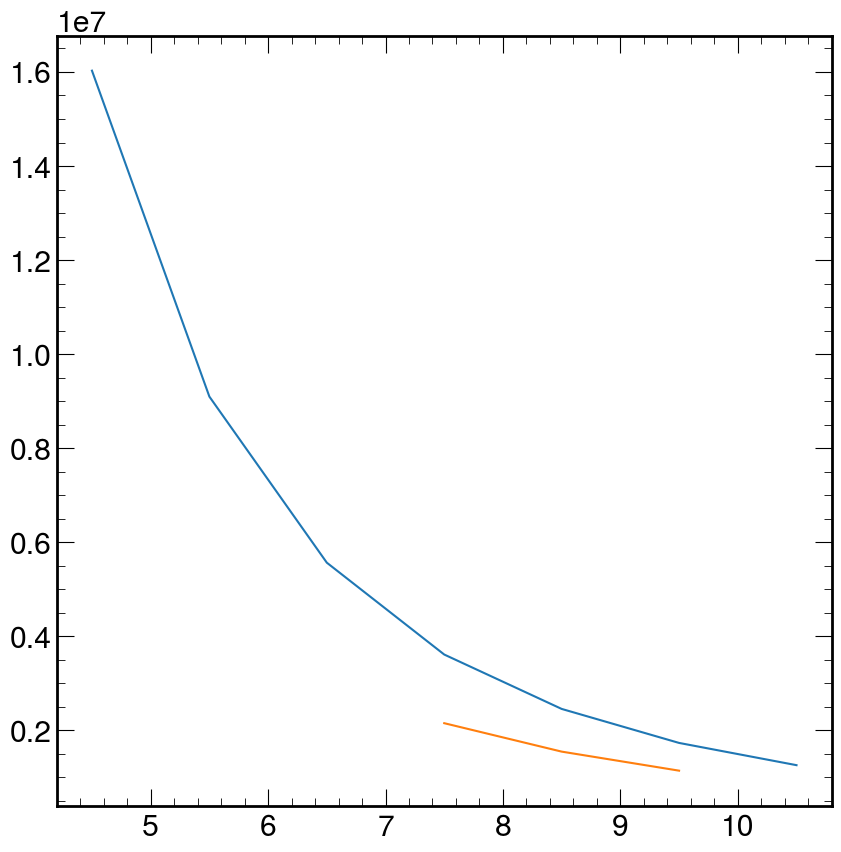

In [69]:
#simulations

total = '/work/submit/mori25/Darkphotons_ludo/dyturbo-1.3.3/lowmassdyTotal_NNLO_pt0_0p25.txt' 
data_total = np.loadtxt(total, skiprows=1)[:-1]

print(data_total)

total_new = '/work/submit/mori25/Darkphotons_ludo/dyturbo-1.3.3/lowmassdyTotal_NNLO_pt0_0p25_new.txt' 
data_total_new = np.loadtxt(total_new, skiprows=1)[:-1]

print(data_total_new)

pt1 = '/work/submit/mori25/Darkphotons_ludo/dyturbo-1.3.3/lowmassdyFiducial_NNLO_pt1_fun2_0p5.txt' 
data_pt1 = np.loadtxt(pt1, skiprows=1)
pt2 = '/work/submit/mori25/Darkphotons_ludo/dyturbo-1.3.3/lowmassdyFiducial_NNLO_pt2_1p0.txt' 
data_pt2 = np.loadtxt(pt2, skiprows=1)
pt3 = '/work/submit/mori25/Darkphotons_ludo/dyturbo-1.3.3/lowmassdyFiducial_NNLO_pt3_func2_0p5.txt' 
data_pt3 = np.loadtxt(pt3, skiprows=1)

# print(data_pt1,data_pt2,data_pt3)

fiducial = np.concatenate([data_pt1[:-1],data_pt2[:-1],data_pt3[:-1]])[:-4]

bin_centers =(fiducial[:,0]+fiducial[:,1])/2
bin_centers_tot =(data_total[:,0]+data_total[:,1])/2
bin_centers_tot_new =(data_total_new[:,0]+data_total_new[:,1])/2

#these two are computed with different versions of CMSSW. the "new" is consistent with the R2 and makes sense for the comparison 
total_interpolated = CubicSpline(bin_centers_tot, data_total[:,2]) 
total_interpolated_new = CubicSpline(bin_centers_tot_new, data_total_new[:,2]) 

scale_DP_10GeV = 581/total_interpolated_new(10)  #ratio of DP to DY at 10GeV
xsec_dp_fid = scale_DP_10GeV*fiducial[:,2] #the scaled fiducial xsec for DP  
xsec_dp_fid_err = scale_DP_10GeV*fiducial[:,3] #the scaled fiducial xsec for DP  
xsec_dp_full = scale_DP_10GeV*data_total[:,2]
xsec_dp_full_err = scale_DP_10GeV*data_total[:,3]


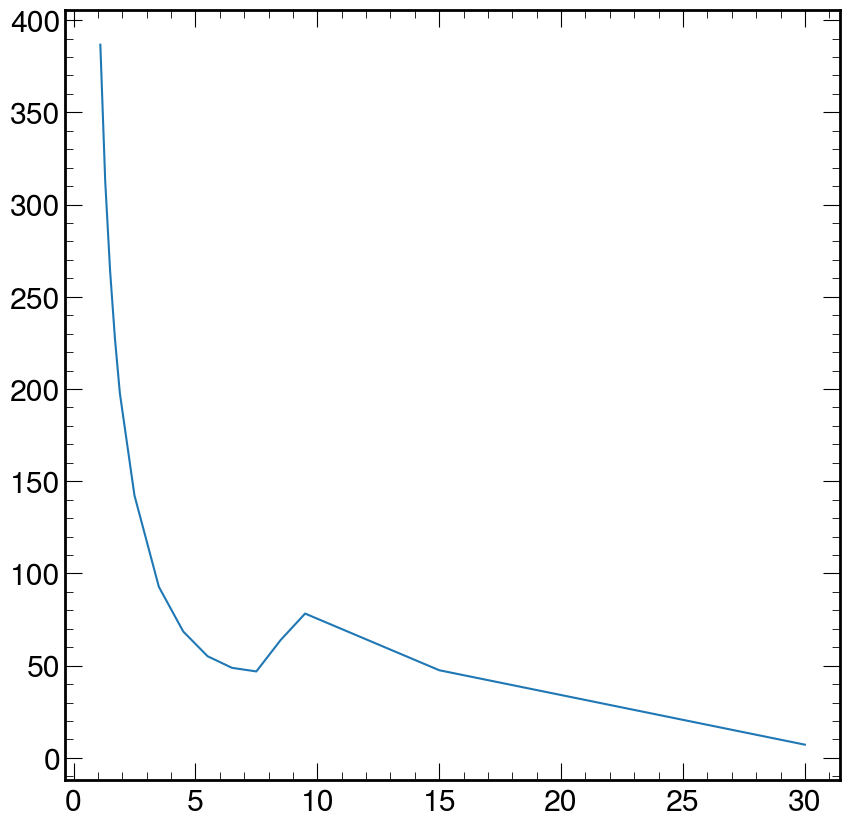

In [70]:
mass_points_R2 = [1.1,1.3,1.5,1.7,1.9,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,15,30]
xsec_R2 = [386.7, 312.7, 264.1, 227.2, 197.8, 142.3, 92.74, 68.51, 55.09, 48.8, 46.85, 63.94, 78.23, 47.51, 7.143]
DP_fid_R2 = CubicSpline(mass_points_R2,xsec_R2)
plt.plot(mass_points_R2,xsec_R2)


#this is verified data from R2


In [71]:
mass = get_lims()[0]

e0 = 0.02
spline = CubicSpline(bin_centers, xsec_dp_fid)
scale_DP = e0**2/spline(mass) #smoothened factor to convert model independent limit to epsilon2

print(DP_fid_R2(bin_centers)/xsec_dp_fid)


2.6164177562341595 4.218256936712153
[0.91202922 0.96201802 0.95549612 0.95230229 0.96877697 0.97895576
 0.96239293]


In [72]:
# import matplotlib.ticker as ticker
# import matplotlib.patches as patches

# def plot_xsec(plot_R2_acc=False,plot_DP_fid=False,plot_DP_tot=False,plot_DY=True,plot_R2_DP=False):
#     hep.style.use("CMS")

#     fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 9), sharex=True, gridspec_kw={'height_ratios': [2, 1], 'hspace':0.05})
#     hep.cms.text("Simulation", ax=ax1)

#     if plot_DY:
#         ax1.errorbar(bin_centers, data_total[:-2,2], yerr=data_total[:-2,3], fmt='s', label='Drell-Yan (DYTurbo, full)', color='blue')
#         ax1.errorbar(bin_centers, fiducial[:,2], yerr=fiducial[:,3], fmt='s', label='Drell-Yan (DYTurbo, fiducial)', color='cyan')
#         ax1.plot(bin_centers,data_total[:-2,2],color="blue")
#         ax1.plot(bin_centers,fiducial[:,2],color="cyan")
#         ax1.set_ylim((1e4,1e10))


#     if plot_DP_tot:
#         ax1.errorbar(bin_centers_tot[:-2], xsec_dp_full[:-2], yerr=xsec_dp_full_err[:-2], fmt='^', label=r'Full $\sqrt{s}$=13.6 TeV', color='red')
#         ax1.plot(bin_centers_tot[:-2],xsec_dp_full[:-2],color="red")
#         ax1.set_ylim((1e1,1e6))

#     if plot_DP_fid:
#         ax1.errorbar(bin_centers, xsec_dp_fid, yerr=xsec_dp_fid_err, fmt='s', label=r'Fiducial $\sqrt{s}$=13.6 TeV',color='red')
#         ax1.plot(bin_centers,xsec_dp_fid,color="red",  linestyle='dashed',)
    
#     if plot_R2_DP:
#         ms= np.array([1.1,2,3,4,5,6,7,8])
#         xs=np.array([9e4,4.5e4,1.31e4,5181,3126,2198,1446,1007])
#         m_mid = np.array([1.5, 2.5, 4.5, 5.5, 6.5, 7.5])

#         xs_mid_R2 = CubicSpline(ms,xs)(m_mid)
#         # ax1.errorbar(m_mid,xs_mid_R2, yerr=0, fmt='^', label=r'Full $\sqrt{s}$=13 TeV', color='blue')
#         # ax1.plot(m_mid,xs_mid_R2,color="blue")

#         # ax1.errorbar(m_mid,xs_mid_R2*acceptance_R2[1:-1], yerr=0, fmt='s', label=r'Fiducial $\sqrt{s}$=13 TeV', color='blue')
#         # ax1.plot(m_mid,xs_mid_R2*acceptance_R2[1:-1],color="blue", linestyle='dashed')

#         ax1.errorbar(bin_centers, DP_fid_R2(bin_centers), fmt='^', label=r'Fiducial $\sqrt{s}$=13 TeV, var',color='blue')
#         ax1.plot(bin_centers,DP_fid_R2(bin_centers),color="blue",  linestyle='dashed',)
    

#         # ax1.set_ylim((1e1,None))

#     ylims= ax1.get_ylim()
#     rect = patches.Rectangle((2.6, 2*ylims[0]), 1.55, 0.5*ylims[1], linewidth=1, edgecolor='white', facecolor='white',zorder=4)
#     ax1.add_patch(rect)

#     l = ax1.legend(ncol=2)
#     l.set_zorder(5)

#     # ticks = [2, 3, 4, 5, 6, 7]
#     # ax1.set_xticks(ticks)
#     # ax1.xaxis.set_major_formatter(ticker.ScalarFormatter())
#     # ax1.xaxis.set_minor_formatter(ticker.ScalarFormatter())

#     ax1.set_ylabel(r'$\sigma(pp\rightarrow Z_D\rightarrow \mu\mu$) [pb]')
#     ax1.set_yscale('log')
#     ax1.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=10))
#     ax1.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs='auto', numticks=100))

    

#     if plot_R2_acc: 
#         ratio = fiducial[:,2] / data_total[:-2,2]
#         ratio_error = ratio * np.sqrt((fiducial[:,3] / fiducial[:,2])**2 + (data_total[:-2,3] /data_total[:-2,2] )**2)

#         ax2.errorbar(mass_acceptance[1:-1], acceptance_R2[1:-1], yerr=0, fmt='o', color='blue',label=r"$\sqrt{s}$=13 TeV")
#         ax2.plot(mass_acceptance[1:-1], acceptance_R2[1:-1], color='blue')

#         ax2.errorbar(bin_centers, ratio, yerr=ratio_error, fmt='o', color='red',label=r"$\sqrt{s}$=13.6 TeV")
#         ax2.plot(bin_centers, ratio, color='red')

#         M=((acceptance_R2[0:-1] - ratio[0:])/ratio[0:])*100
#         print(acceptance_R2[0:-1], ratio[0:],M)

#         # l2 = ax2.legend()
#         # l2.set_zorder(5)


#     else: 
#         print(1)
#         # ax2.errorbar(bin_centers, ratio, yerr=ratio_error, fmt='o', color='green')
#         # ax2.plot(bin_centers, ratio, color='green')

#     rect = patches.Rectangle((2.6, 3e-3), 1.55, 0.1, linewidth=1, edgecolor='white', facecolor='white',zorder=4)
#     ax2.add_patch(rect)

#     ax2.set_xscale('log')

#     ticks = [2, 3, 4, 5, 6, 7,8]
#     ax2.set_xticks(ticks)
#     ax2.xaxis.set_major_formatter(ticker.ScalarFormatter())
#     ax2.xaxis.set_minor_formatter(ticker.ScalarFormatter())

#     ax2.set_yscale('log')
#     ax2.set_xlim((1.5,8))
#     ax2.set_ylim((1e-3,0.4))
#     ax2.set_xlabel(r'$m_{Z_D}$ [GeV]')
#     ax2.set_ylabel('Acceptance')

#     ax2.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=10))
#     ax2.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs='auto', numticks=100))
#     # Show the plot
#     plt.show()


In [106]:
import matplotlib.ticker as ticker
import matplotlib.patches as patches

def plot_xsec(plot_R2_acc=False,plot_DP_fid=False,plot_DP_tot=False,plot_DY=True,plot_R2_DP=False):
    hep.style.use("CMS")

    fig, ax1 = plt.subplots(figsize=(10, 8))
    hep.cms.text("Simulation", ax=ax1)

    if plot_DY:
        ax1.errorbar(bin_centers, data_total[:-2,2], yerr=data_total[:-2,3], fmt='s', label='Drell-Yan (DYTurbo, full)', color='blue')
        ax1.errorbar(bin_centers, fiducial[:,2], yerr=fiducial[:,3], fmt='s', label='Drell-Yan (DYTurbo, fiducial)', color='cyan')
        ax1.plot(bin_centers,data_total[:-2,2],color="blue")
        ax1.plot(bin_centers,fiducial[:,2],color="cyan")
        ax1.set_ylim((1e4,1e10))


    if plot_DP_tot:
        ax1.errorbar(bin_centers_tot[:-2], xsec_dp_full[:-2], yerr=xsec_dp_full_err[:-2], fmt='^', label=r'Full $\sqrt{s}$=13.6 TeV', color='red')
        ax1.plot(bin_centers_tot[:-2],xsec_dp_full[:-2],color="red")
        ax1.set_ylim((1e1,1e6))

    if plot_DP_fid:
        ax1.errorbar(bin_centers, xsec_dp_fid, yerr=xsec_dp_fid_err, fmt='s', label=r'Run 3 ($\sqrt{s}$=13.6 TeV)',color='red')
        ax1.plot(bin_centers,xsec_dp_fid,color="red",  linestyle='dashed',)
    
    if plot_R2_DP:
        ms= np.array([1.1,2,3,4,5,6,7,8])
        xs=np.array([9e4,4.5e4,1.31e4,5181,3126,2198,1446,1007])
        m_mid = np.array([1.5, 2.5, 4.5, 5.5, 6.5, 7.5])
        ax1.errorbar(bin_centers, DP_fid_R2(bin_centers), fmt='^', label=r'Run 2 ($\sqrt{s}$=13 TeV)',color='blue')
        ax1.plot(bin_centers,DP_fid_R2(bin_centers),color="blue",  linestyle='dashed',)
    
        # ax1.set_ylim((1e1,None))

    ylims= ax1.get_ylim()
    rect = patches.Rectangle((2.6, 2*ylims[0]), 1.55, 0.5*ylims[1], linewidth=1, edgecolor='white', facecolor='white',zorder=4)
    ax1.add_patch(rect)

    l = ax1.legend()
    l.set_zorder(5)

    ax1.set_ylabel(r'$\sigma(pp\rightarrow Z_D)\times \mathcal{B}(Z_D\rightarrow\mu\mu) \times A$ [pb]')


    rect = patches.Rectangle((2.6, 3e-3), 1.55, 0.1, linewidth=1, edgecolor='white', facecolor='white',zorder=4)
    ax1.add_patch(rect)

    ax1.set_xscale('log')

    ticks = [2, 3, 4, 5, 6, 7,8]
    ax1.set_xticks(ticks)
    ax1.xaxis.set_major_formatter(ticker.ScalarFormatter())
    ax1.xaxis.set_minor_formatter(ticker.ScalarFormatter())

    ax1.set_yscale('log')
    ax1.set_xlim((1.5,8))
    ax1.set_ylim((20,800))
    ax1.set_xlabel(r'$m_{Z_D}$ [GeV]')

    ax1.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=10))
    ax1.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs='auto', numticks=100))
    # Show the plot
    plt.show()


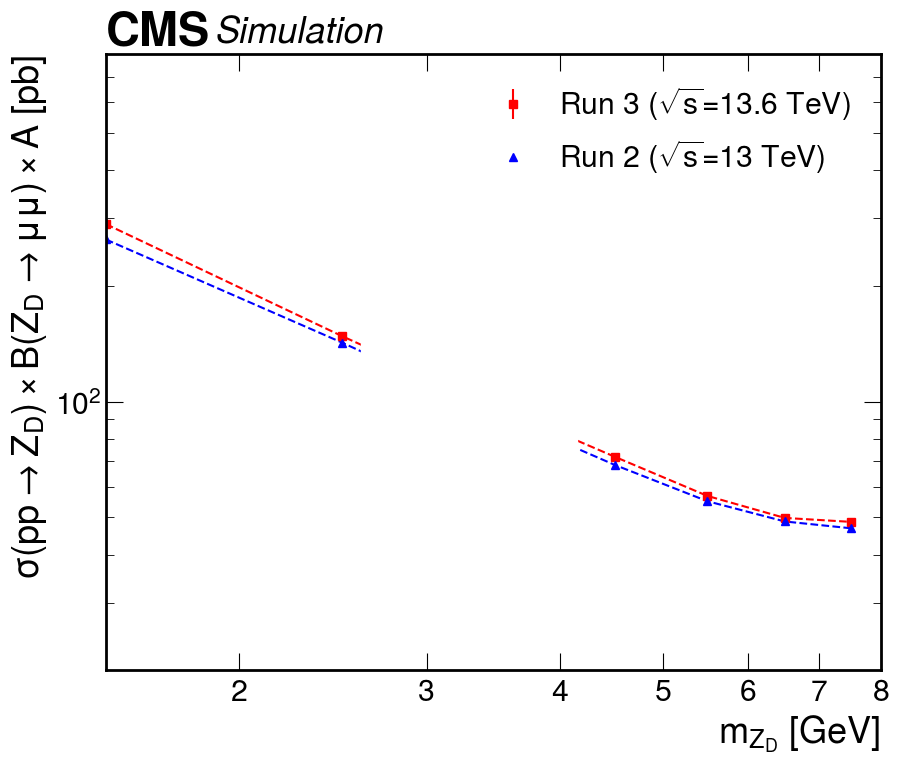

In [107]:
# plot_xsec(plot_R2_acc=True)
plot_xsec(plot_R2_acc=False,plot_DY=False,plot_R2_DP=True,plot_DP_fid=True,plot_DP_tot=False)
# plot_xsec(plot_R2_acc=True,plot_DP=False)
# plot_xsec(plot_R2_acc=True,plot_DP=True,plot_DY=False,plot_R2_DP=True)

In [108]:
def plot_mod_ind(p,lim_level,plot_obs_95_R2=False,plot_central_95_R2=False):
    
    mass,limit1,limit168down,limit168up,limit195down,limit195up,q = p

    hep.style.use("CMS")
    fig, ax = plt.subplots(figsize=(9,7))
    hep.cms.label("Preliminary",data=True,lumi=62.4,com=13.6)
    ax.set_xscale('log')
    ax.set_yscale('log')

    plt.fill_between(mass[:q], limit195down[:q], limit195up[:q], color='#ffff00', alpha=0.8, label='±2σ')
    plt.fill_between(mass[:q], limit168down[:q],  limit168up[:q], color='#00ff00', alpha=0.8, label='±1σ')
    plt.plot(mass[:q], limit1[:q], color='black', linestyle='dashed', linewidth=2, label=fr'Expected $CL_s$ {lim_level}$\%$ ')

    plt.fill_between(mass[q+1:], limit195down[q+1:], limit195up[q+1:], color='#ffff00', alpha=0.8)
    plt.fill_between(mass[q+1:], limit168down[q+1:],  limit168up[q+1:], color='#00ff00', alpha=0.8)
    plt.plot(mass[q+1:], limit1[q+1:], color='black', linestyle='dashed', linewidth=2)

    if plot_obs_95_R2:
        plt.plot(mass_95_R2[:q_95_R2], observed_95_R2[:q_95_R2], color='blue', linewidth=2)
        plt.plot(mass_95_R2[q_95_R2+1:], observed_95_R2[q_95_R2+1:], color='blue', linewidth=2, label=fr"Observed $CL_s$ {lim_level}$\%$ (Run 2)")

    if plot_central_95_R2:
        plt.plot(mass_95_R2[:q_95_R2], central_95_R2[:q_95_R2], color='blue', linestyle='dashed', linewidth=2)
        plt.plot(mass_95_R2[q_95_R2+1:], central_95_R2[q_95_R2+1:], color='blue', linestyle='dashed', linewidth=2, label=fr"Expected $CL_s$ {lim_level}$\%$ (Run 2)")

        spline_R3 = CubicSpline(mass,limit1)
        spline_R2 = CubicSpline(mass_95_R2,central_95_R2)

        mrange = np.concatenate([np.linspace(2,2.58,200),np.linspace(4.21,7.86,1000)])

        print(mrange[190:210])
        print(((spline_R2(mrange)-spline_R3(mrange))/spline_R2(mrange))[190:210])
        print((spline_R2(mrange))[190:210])
        print((spline_R3(mrange))[190:210])
        
        m = np.min(((spline_R2(mrange)-spline_R3(mrange))/spline_R2(mrange)))*100
        a = np.argmin((spline_R2(mrange)-spline_R3(mrange))/spline_R2(mrange))
        M = np.max(((spline_R2(mrange)-spline_R3(mrange))/spline_R2(mrange)))*100
        print(f"Improvement between {m} and {M} %",a,len((spline_R2(mrange)-spline_R3(mrange))/spline_R2(mrange)))
        print(mrange[a])

        # plt.plot(mrange, spline_R2(mrange), color='red', linestyle='dashed', linewidth=2, label=fr"spline")
        


    plt.xlabel("$m_{\mu\mu}$ [GeV]")
    plt.ylabel(r"$\sigma(pp \rightarrow X) \times BR(X \rightarrow \mu\mu) \times A\ [pb]$")
    plt.legend()
    plt.xlim(2, 8)
    ticks = [2, 3, 4, 5, 6, 7, 8]
    ax.set_xticks(ticks)
    plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())
    plt.gca().xaxis.set_minor_formatter(ticker.ScalarFormatter())
    plt.ylim(0.01, 10)

    # plt.savefig("/work/submit/mori25/Darkphotons_ludo/offline_analysis/limits/limit_full_nonuisance_C.png")
    plt.show()


def plot_dp(p,lim_level,plot_obs_90_R2=False,plot_central_95_R2=False):

    mass,limit1,limit168down,limit168up,limit195down,limit195up,q = p

    hep.style.use("CMS")
    fig, ax = plt.subplots(figsize=(9,7))
    hep.cms.label("Preliminary",data=True,lumi=62.4,com=13.6)
    ax.set_xscale('log')
    ax.set_yscale('log')

    plt.fill_between(mass[:q], scale_DP[:q]*limit195down[:q], scale_DP[:q]*limit195up[:q], color='#ffff00', alpha=0.8, label='±2σ')
    plt.fill_between(mass[:q], scale_DP[:q]*limit168down[:q],  scale_DP[:q]*limit168up[:q], color='#00ff00', alpha=0.8, label='±1σ')
    plt.plot(mass[:q], scale_DP[:q]*limit1[:q], color='black', linestyle='dashed', linewidth=2, label=fr'Expected $CL_s$ {lim_level}$\%$ ')


    plt.fill_between(mass[q+1:], scale_DP[q+1:]*limit195down[q+1:], scale_DP[q+1:]*limit195up[q+1:], color='#ffff00', alpha=0.8)
    plt.fill_between(mass[q+1:], scale_DP[q+1:]*limit168down[q+1:],  scale_DP[q+1:]*limit168up[q+1:], color='#00ff00', alpha=0.8)
    plt.plot(mass[q+1:], scale_DP[q+1:]*limit1[q+1:], color='black', linestyle='dashed', linewidth=2)


    if plot_obs_90_R2:
        plt.plot(mass_90_R2[:q_90_R2], observed_90_R2[:q_90_R2], color='blue', linewidth=2)
        plt.plot(mass_90_R2[q_90_R2+1:], observed_90_R2[q_90_R2+1:], color='blue', linewidth=2, label=fr"Observed $CL_s$ {lim_level}$\%$ (Run 2)")

    if plot_central_95_R2:
        
        ms= np.array([1.1,2,3,4,5,6,7,8])
        xs=np.array([9e4,4.5e4,1.31e4,5181,3126,2198,1446,1007]) # inclusive from note

        m_mid = np.array([1.5, 2.5, 4.5, 5.5, 6.5, 7.5])
        xs_mid_R2 = CubicSpline(ms,xs)(m_mid)*acceptance_R2[1:-1]

        mass = get_lims()[0]

        e0 = 0.02
        spline = CubicSpline(m_mid, xs_mid_R2)
        scale_DP_R2 = e0**2/DP_fid_R2(mass_95_R2)
        plt.plot(mass_95_R2[:q_95_R2], scale_DP_R2[:q_95_R2]*central_95_R2[:q_95_R2], color='blue', linestyle='dashed', linewidth=2)
        plt.plot(mass_95_R2[q_95_R2+1:], scale_DP_R2[q_95_R2+1:]*central_95_R2[q_95_R2+1:], color='blue', linestyle='dashed', linewidth=2, label=fr"Expected $CL_s$ {lim_level}$\%$ (Run 2)")

       

    plt.xlabel("$m_{Z_D}$ [GeV]")
    plt.ylabel(r"$\varepsilon^2$")
    plt.legend(loc='lower right')
    # Set axis limits
    plt.xlim(2, 8)
    # ax.ticklabel_format(style='plain')
    ticks = [2, 3, 4, 5, 6, 7, 8]
    ax.set_xticks(ticks)

    ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=10))
    ax.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs='auto', numticks=100))
    
    plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())
    plt.gca().xaxis.set_minor_formatter(ticker.ScalarFormatter())
    plt.ylim(1e-8, 1e-4)
    # Save the plot
    # plt.savefig("/work/submit/mori25/Darkphotons_ludo/offline_analysis/limits/limit_full_nonuisance_e2.png")

    # Show the plot
    plt.show()

2.6164177562341595 4.218256936712153


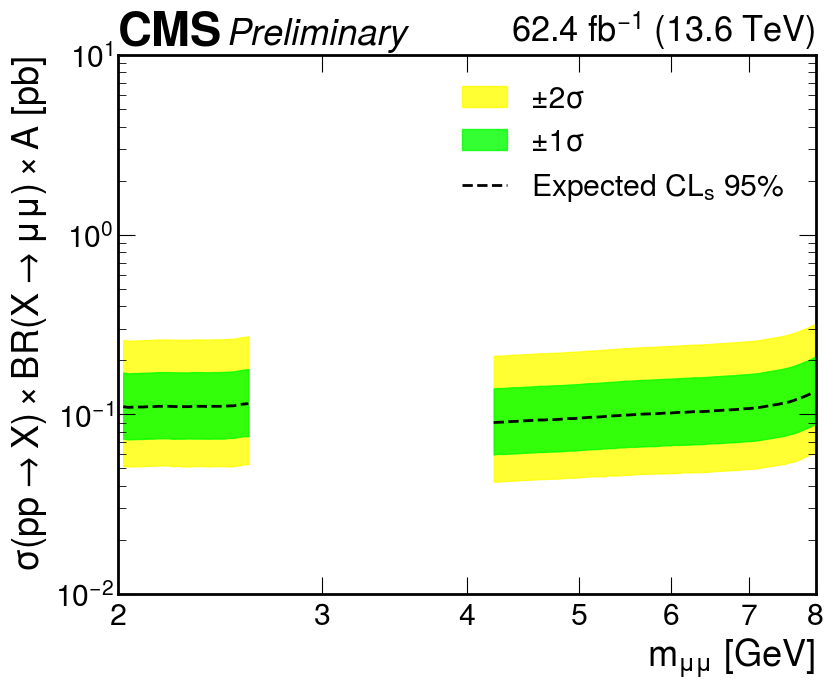

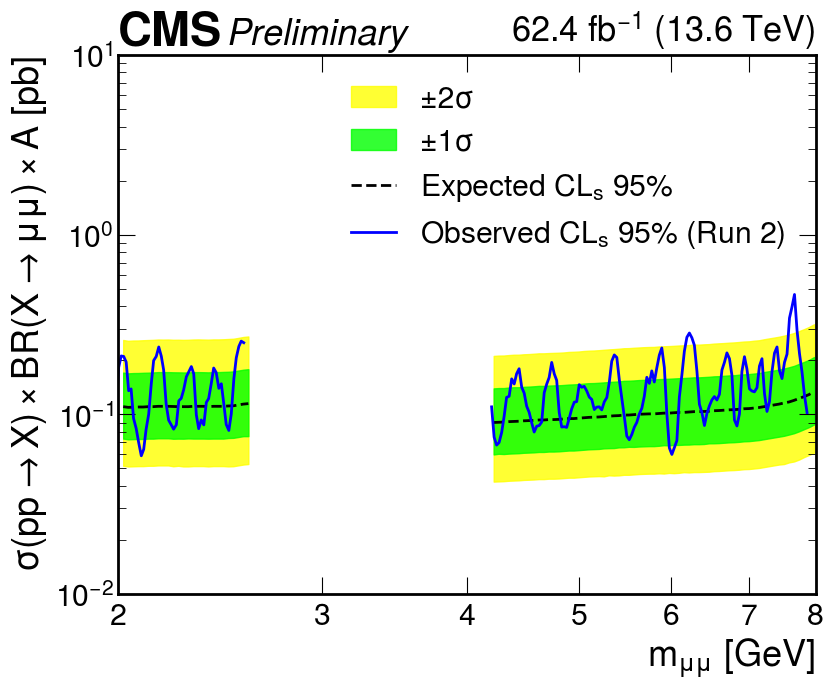

[2.55376884 2.55668342 2.55959799 2.56251256 2.56542714 2.56834171
 2.57125628 2.57417085 2.57708543 2.58       4.21       4.21365365
 4.21730731 4.22096096 4.22461461 4.22826827 4.23192192 4.23557558
 4.23922923 4.24288288]
[ 0.02745281  0.02570413  0.02350782  0.02045561  0.01614006  0.01046387
  0.00412435 -0.00197811 -0.00693671 -0.00984331  0.20448134  0.20306196
  0.20197159  0.20123911  0.20087199  0.20081882  0.20099959  0.20133407
  0.2017423   0.20214462]
[0.11602791 0.1159597  0.11594671 0.11596807 0.11600292 0.11603081
 0.11604266 0.116042   0.11603305 0.11602    0.11284578 0.1128414
 0.11285091 0.11287835 0.11292708 0.11299334 0.11306939 0.11314745
 0.11321973 0.11327843]
[0.11284262 0.11297906 0.11322105 0.11359587 0.11413063 0.11481668
 0.11556406 0.11627155 0.11683794 0.11716202 0.08977092 0.0899276
 0.09005823 0.09016281 0.09024319 0.09030215 0.09034249 0.09036701
 0.09037852 0.09037981]
Improvement between -0.9843310119417916 and 52.43405413659453 % 199 1200
2.58


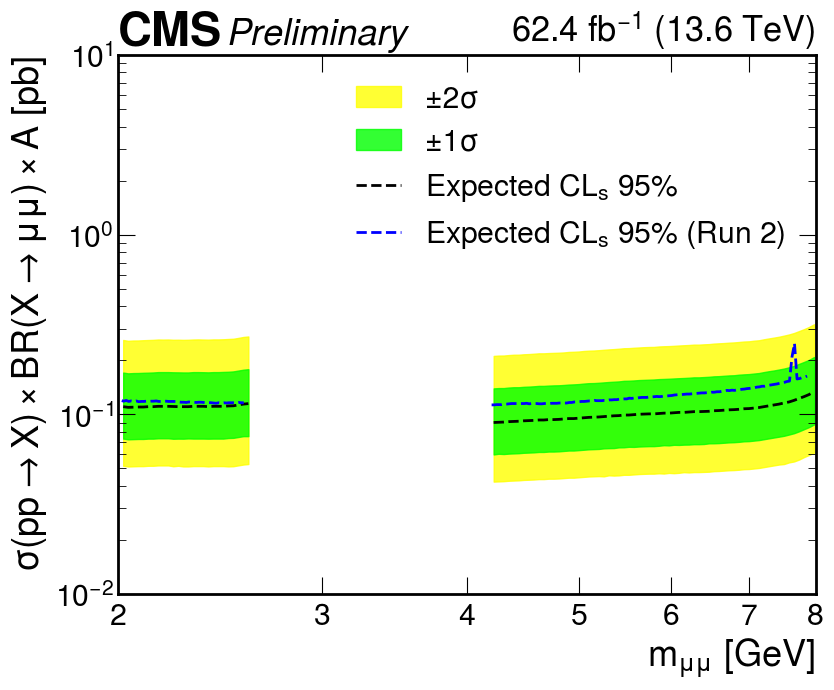

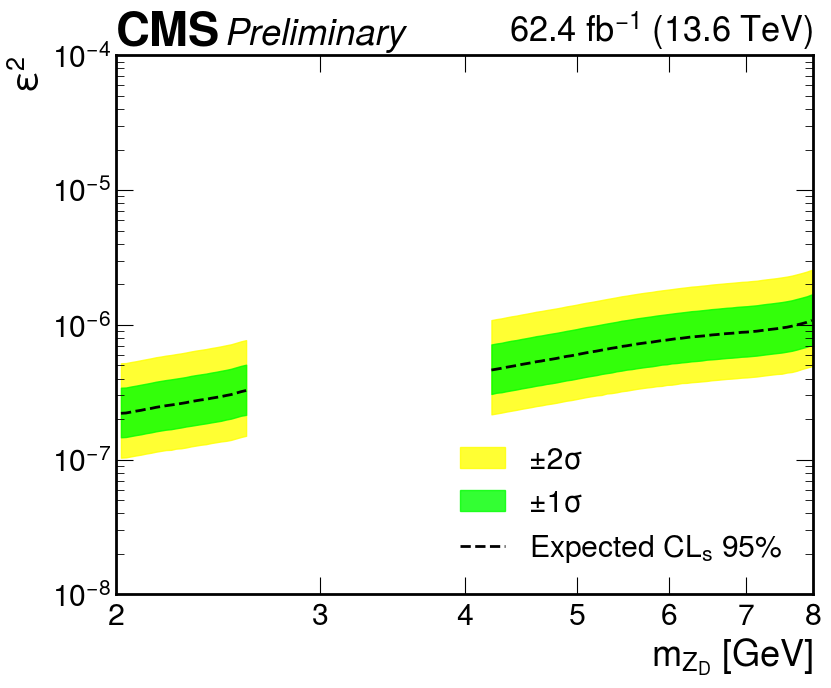

2.6164177562341595 4.218256936712153


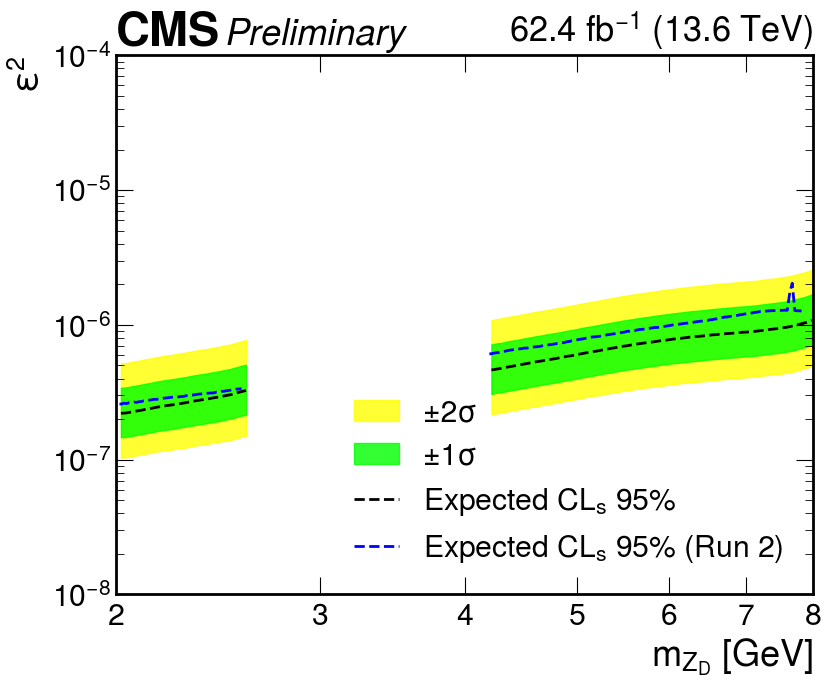

In [109]:
p = get_lims() 
plot_mod_ind(p,95)
plot_mod_ind(p,95,True,False)
plot_mod_ind(p,95,False,True)
# plot_mod_ind(p,95,True,True)
plot_dp(p,95,plot_central_95_R2=False)
plot_dp(p,95,plot_central_95_R2=True)

2.6164177562341595 4.218256936712153


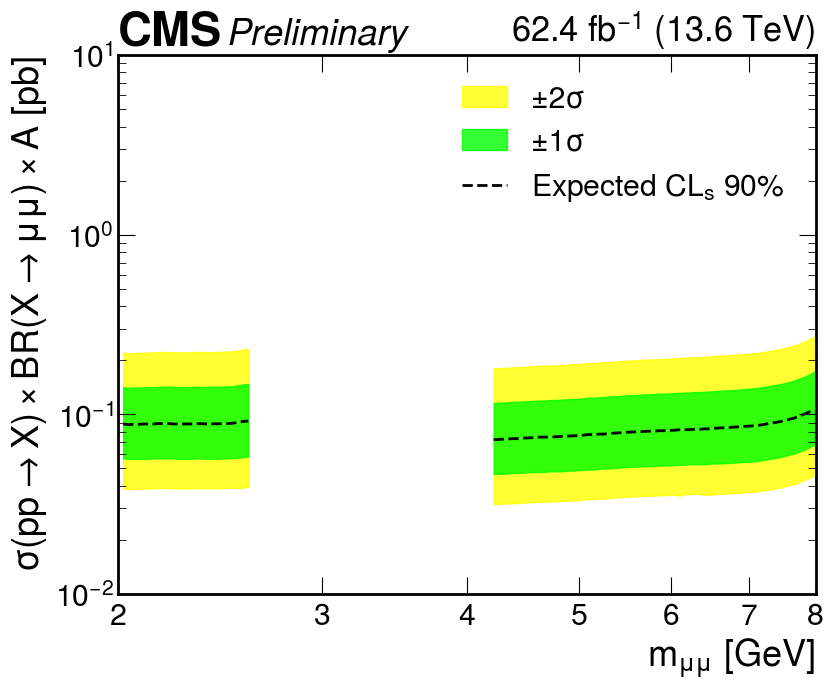

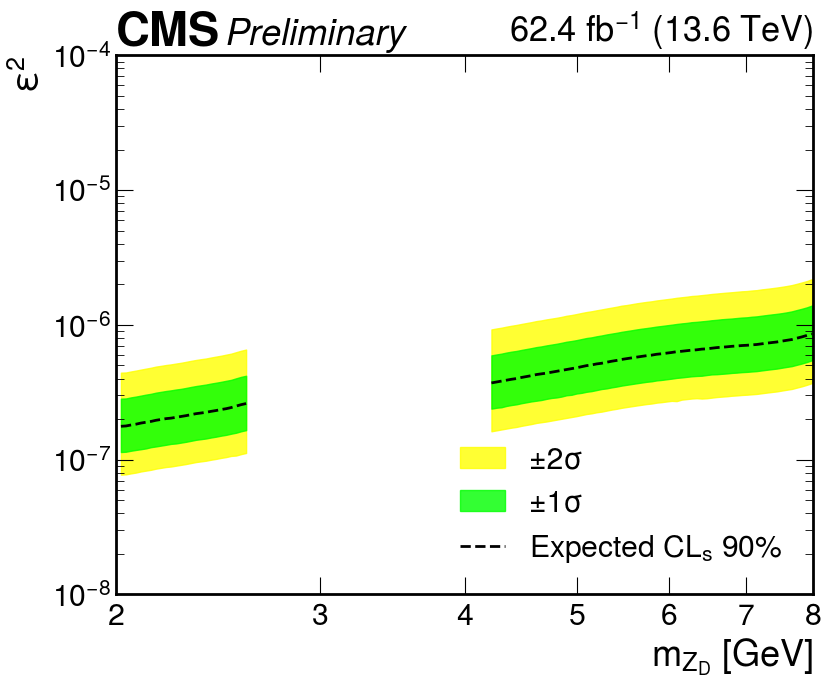

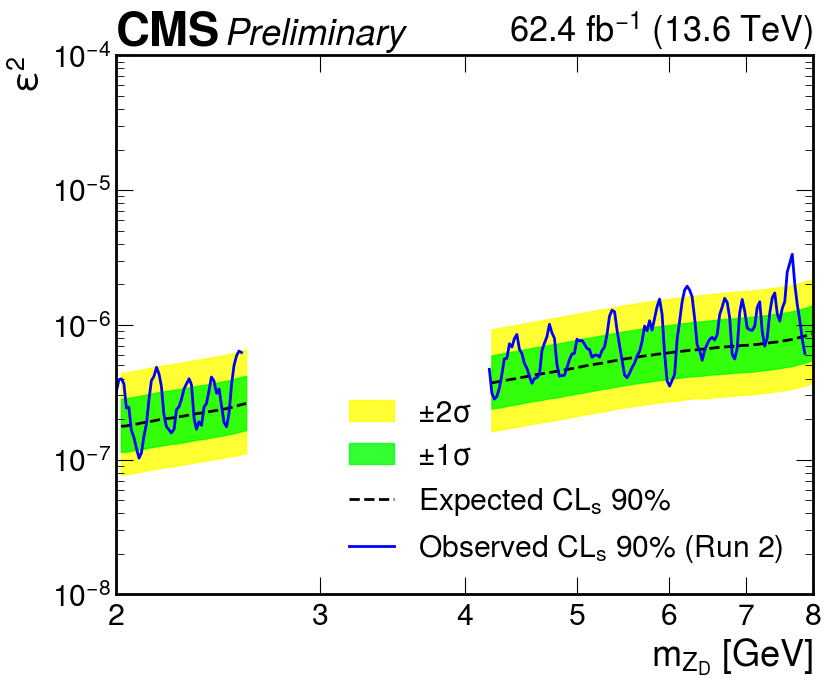

In [110]:
p90 = get_lims(False)
plot_mod_ind(p90,90)
plot_dp(p90,90)
plot_dp(p90,90,True)

In [111]:
# import matplotlib.patches as patches
# colors ={"kYellow-9" : "#ffff99", "kYellow-8" : "#cccc99", "kYellow-7" : "#ffff66", "kYellow-6" : "#cccc66", "kYellow-5" : "#999966", "kYellow-4" : "#ffff33", "kYellow" : "#ffff00"} 


# fig, ax = plt.subplots(figsize=(8, 6))
# box_width = 1
# box_height = 1
# spacing = 0.5

# # Plot the boxes
# for i, color in enumerate(colors.keys()):
#     rect = patches.Rectangle((i * (box_width + spacing), 0), box_width, box_height, facecolor=colors[color])
#     ax.add_patch(rect)

# # Set the limits of the plot
# ax.set_xlim(0, len(colors) * (box_width + spacing))
# ax.set_ylim(0, box_height + spacing)

# # Remove the axis
# ax.axis('off')

# # Show the plot
# plt.show()